In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('variables.csv')

In [ ]:
df = df.drop(columns=['Epic_week'])
df

,Infectious and Parasitic Diseases,Respiratory Infection,Daily_Rainfall_Total_mm,Mean_Mean_Temperature_C,Mean_Maximum_Temperature_C,Mean_Minimum_Temperature_C,Mean_Mean_Wind_Speed_kmh,Mean_Max_Wind_Speed_kmh
0,1306,1437,20.071978,25.928571,30.197143,23.482857,7.731429,29.228571
1,1209,1370,33.892308,25.142857,27.951429,23.020000,10.257143,32.971429
2,1115,1636,6.319780,26.700000,31.654286,23.760000,7.605714,27.971429
3,1083,1785,1.977473,26.930952,31.360000,24.002857,13.591429,32.157143
4,1340,2244,0.655495,27.189286,31.737143,24.214286,14.111429,34.242857
...,...,...,...,...,...,...,...,...
673,1711,2694,8.778947,27.619328,31.300877,24.605430,6.638137,33.339474
674,1389,2224,9.319298,27.169853,31.748693,24.728945,6.130859,27.621055
675,1621,2712,10.119799,27.022111,31.144712,24.709489,6.675198,30.162873
676,1749,2801,4.597494,27.792700,32.482527,25.137852,7.526247,30.939678


Next, we discuss the autoregressive model. Autoregression is actually a special linear regression model in which the independent variable is the lagged value of the dependent variable. In this study, we also consider the lagged values of other exogenous variables. This is for the subsequent environmental epidemiological analysis

In [ ]:
import itertools
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### How to choose the optimal (p,q)?  ACF+PACF+AIC or BIC

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


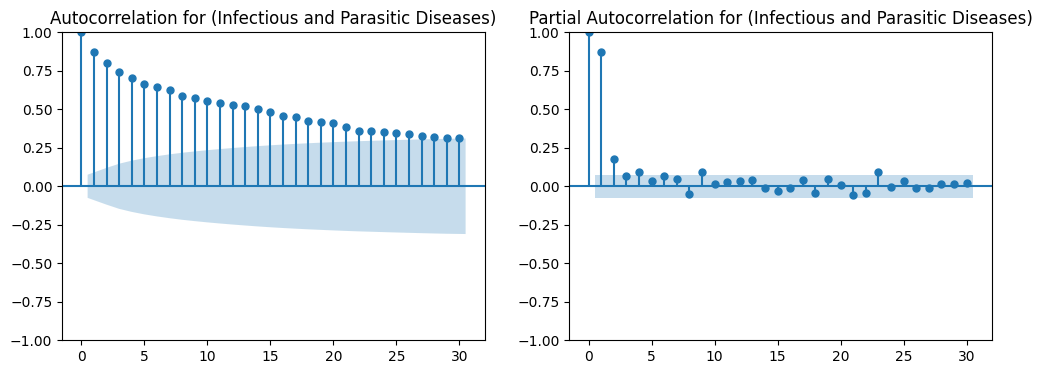

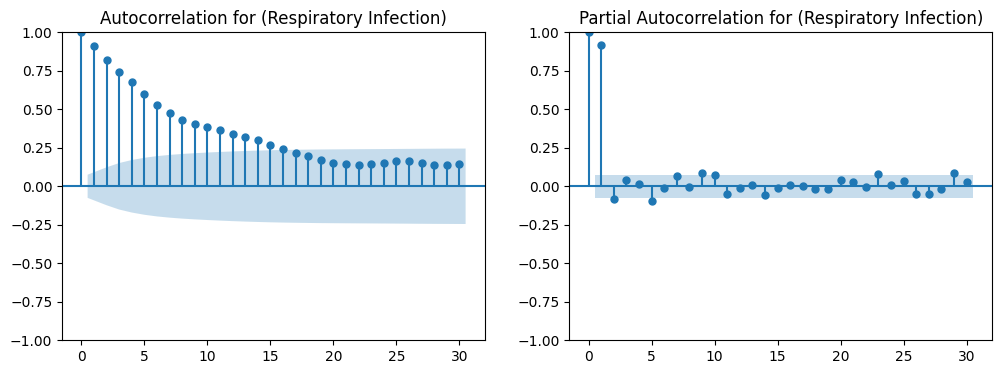

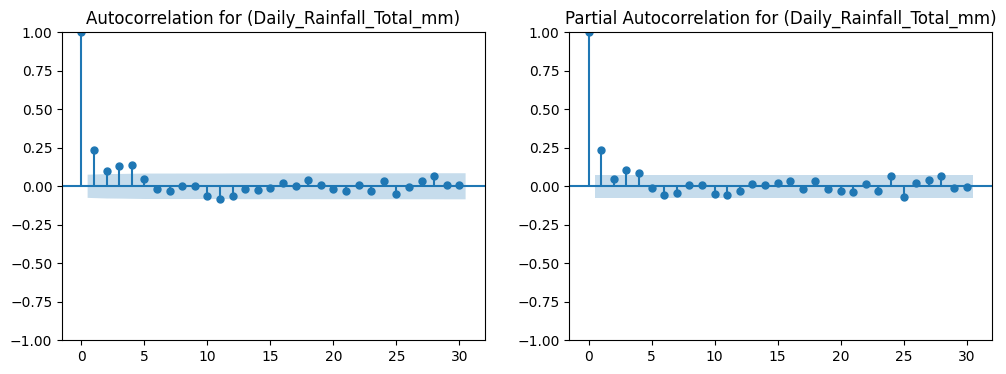

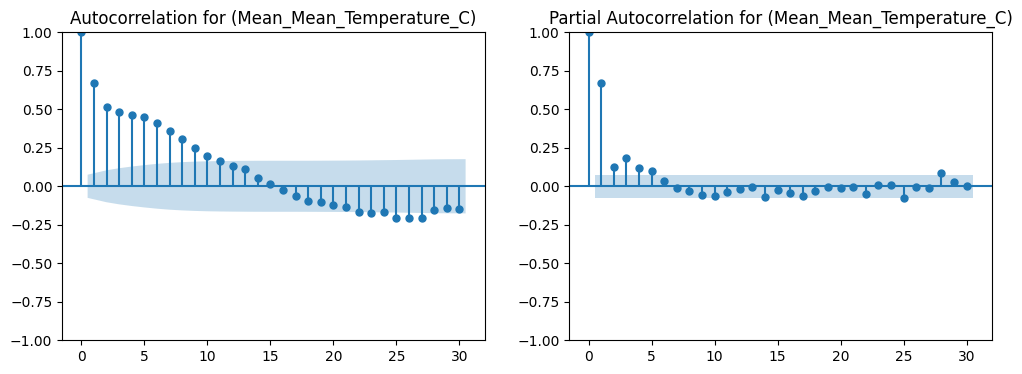

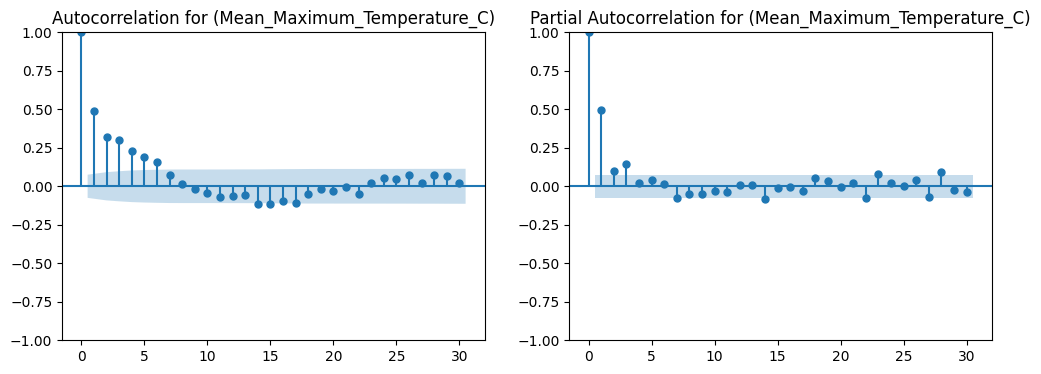

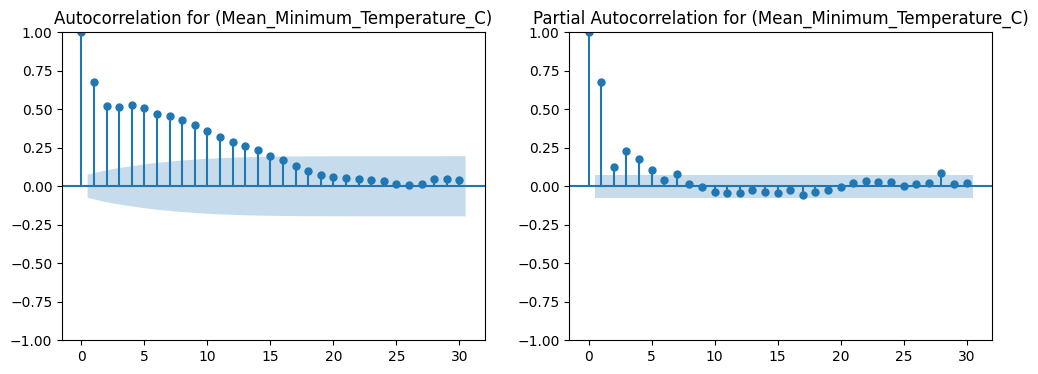

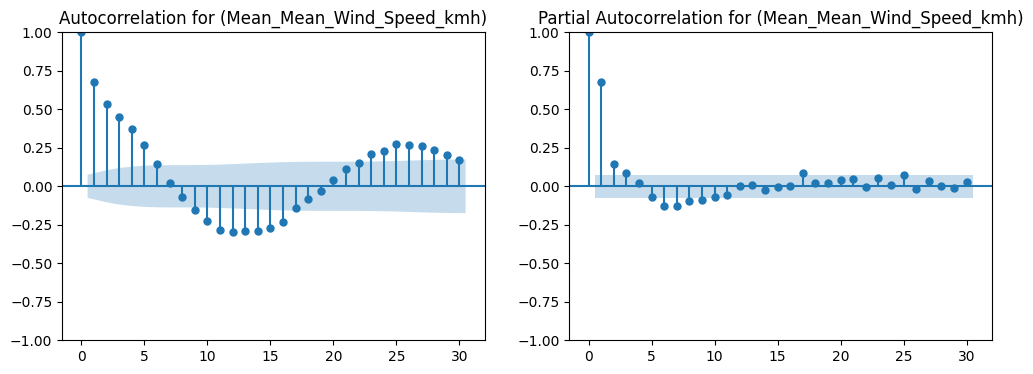

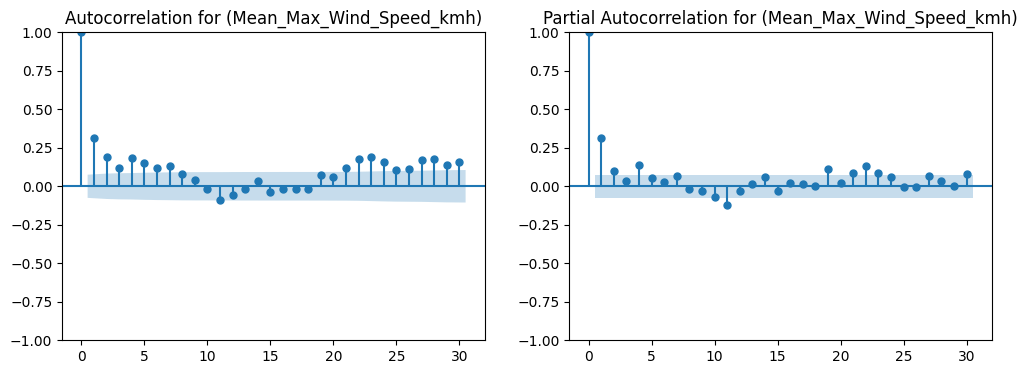

In [ ]:
for col in df.columns:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    plot_acf(df[col], ax=ax[0], lags=30)
    plot_pacf(df[col], ax=ax[1], lags=30)
    ax[0].set(title='Autocorrelation for ({})'.format(col))
    ax[1].set(title='Partial Autocorrelation for ({})'.format(col))
    plt.show()

### Autoregression with exogenous variables model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df

,Infectious and Parasitic Diseases,Respiratory Infection,Daily_Rainfall_Total_mm,Mean_Mean_Temperature_C,Mean_Maximum_Temperature_C,Mean_Minimum_Temperature_C,Mean_Mean_Wind_Speed_kmh,Mean_Max_Wind_Speed_kmh
0,1306,1437,20.071978,25.928571,30.197143,23.482857,7.731429,29.228571
1,1209,1370,33.892308,25.142857,27.951429,23.020000,10.257143,32.971429
2,1115,1636,6.319780,26.700000,31.654286,23.760000,7.605714,27.971429
3,1083,1785,1.977473,26.930952,31.360000,24.002857,13.591429,32.157143
4,1340,2244,0.655495,27.189286,31.737143,24.214286,14.111429,34.242857
...,...,...,...,...,...,...,...,...
673,1711,2694,8.778947,27.619328,31.300877,24.605430,6.638137,33.339474
674,1389,2224,9.319298,27.169853,31.748693,24.728945,6.130859,27.621055
675,1621,2712,10.119799,27.022111,31.144712,24.709489,6.675198,30.162873
676,1749,2801,4.597494,27.792700,32.482527,25.137852,7.526247,30.939678


In [ ]:
n_lag = 4
n_steps = 2
# Create lagged variables for the deseas count, temperature, and rainfall
columns = list(df.columns)

for col in columns:  
    for i in range(1, n_lag + 1):
        df[f"{col}_lag_{i}"] = df[col].shift(i)

# Drop rows with NaN values generated by shifting
df = df.dropna()

# Only keep the target column when there is no lag
df = df.drop(df.columns[1:8], axis=1)

In [ ]:
y = df['Infectious and Parasitic Diseases'].shift(-n_steps+1)
y = y.dropna()
df = df.iloc[:-n_steps+1, :]
X = df.drop('Infectious and Parasitic Diseases', axis=1)

In [ ]:
X

,Infectious and Parasitic Diseases_lag_1,Infectious and Parasitic Diseases_lag_2,Infectious and Parasitic Diseases_lag_3,Infectious and Parasitic Diseases_lag_4,Respiratory Infection_lag_1,Respiratory Infection_lag_2,Respiratory Infection_lag_3,Respiratory Infection_lag_4,Daily_Rainfall_Total_mm_lag_1,Daily_Rainfall_Total_mm_lag_2,...,Mean_Minimum_Temperature_C_lag_3,Mean_Minimum_Temperature_C_lag_4,Mean_Mean_Wind_Speed_kmh_lag_1,Mean_Mean_Wind_Speed_kmh_lag_2,Mean_Mean_Wind_Speed_kmh_lag_3,Mean_Mean_Wind_Speed_kmh_lag_4,Mean_Max_Wind_Speed_kmh_lag_1,Mean_Max_Wind_Speed_kmh_lag_2,Mean_Max_Wind_Speed_kmh_lag_3,Mean_Max_Wind_Speed_kmh_lag_4
4,1083.0,1115.0,1209.0,1306.0,1785.0,1636.0,1370.0,1437.0,1.977473,6.319780,...,23.020000,23.482857,13.591429,7.605714,10.257143,7.731429,32.157143,27.971429,32.971429,29.228571
5,1340.0,1083.0,1115.0,1209.0,2244.0,1785.0,1636.0,1370.0,0.655495,1.977473,...,23.760000,23.020000,14.111429,13.591429,7.605714,10.257143,34.242857,32.157143,27.971429,32.971429
6,1090.0,1340.0,1083.0,1115.0,1656.0,2244.0,1785.0,1636.0,8.457143,0.655495,...,24.002857,23.760000,13.171429,14.111429,13.591429,7.605714,34.471429,34.242857,32.157143,27.971429
7,1035.0,1090.0,1340.0,1083.0,1822.0,1656.0,2244.0,1785.0,4.996703,8.457143,...,24.214286,24.002857,10.274286,13.171429,14.111429,13.591429,31.171429,34.471429,34.242857,32.157143
8,941.0,1035.0,1090.0,1340.0,1747.0,1822.0,1656.0,2244.0,0.488462,4.996703,...,23.805714,24.214286,14.982857,10.274286,13.171429,14.111429,37.285714,31.171429,34.471429,34.242857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,1527.0,1566.0,1478.0,1573.0,2250.0,2262.0,2036.0,2005.0,13.983459,11.262406,...,24.913121,25.171220,5.828095,6.430217,6.214541,6.144277,33.836456,28.495459,30.552703,30.489140
673,1539.0,1527.0,1566.0,1478.0,2642.0,2250.0,2262.0,2036.0,9.747619,13.983459,...,24.770744,24.913121,6.347265,5.828095,6.430217,6.214541,30.392172,33.836456,28.495459,30.552703
674,1711.0,1539.0,1527.0,1566.0,2694.0,2642.0,2250.0,2262.0,8.778947,9.747619,...,24.052484,24.770744,6.638137,6.347265,5.828095,6.430217,33.339474,30.392172,33.836456,28.495459
675,1389.0,1711.0,1539.0,1527.0,2224.0,2694.0,2642.0,2250.0,9.319298,8.778947,...,24.103963,24.052484,6.130859,6.638137,6.347265,5.828095,27.621055,33.339474,30.392172,33.836456


In [ ]:
y

4      1090.0
5      1035.0
6       941.0
7      1039.0
8      1025.0
        ...  
672    1711.0
673    1389.0
674    1621.0
675    1749.0
676    2029.0
Name: Infectious and Parasitic Diseases, Length: 673, dtype: float64

In [ ]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

X = np.array(X)
y = np.array(y)

In [ ]:
train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the mean squared error on training and test sets
train_score = mean_squared_error(y_train, y_train_pred)
test_score = mean_squared_error(y_test, y_test_pred)

# R-squared
train_score_var = np.var(y_train)
train_score_r2 = 1 - (train_score / train_score_var)
test_score_var = np.var(y_test)
test_score_r2 = 1 - (test_score / test_score_var)

print('Training score: {:.2f}, Testing score: {:.2f}'.format(train_score, test_score))
print('R-squared score (training set): {:.2f}'.format(train_score_r2))
print('R-squared score (testing set): {:.2f}'.format(test_score_r2))

Training score: 12320.30, Testing score: 24542.96
R-squared score (training set): 0.71
R-squared score (testing set): 0.60


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_test_pred)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(n_steps,mape))

Mean Absolute Percentage Error for 2 step: 8.87%


In [ ]:
y_test = np.array(y_test)

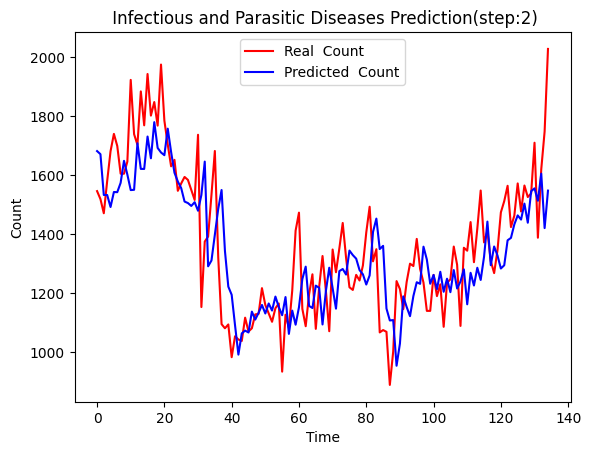

In [ ]:
plt.plot(y_test, color = 'red', label = 'Real  Count')
plt.plot(y_test_pred, color = 'blue', label = 'Predicted  Count')
plt.title(' Infectious and Parasitic Diseases Prediction(step:{})'.format(n_steps))
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()

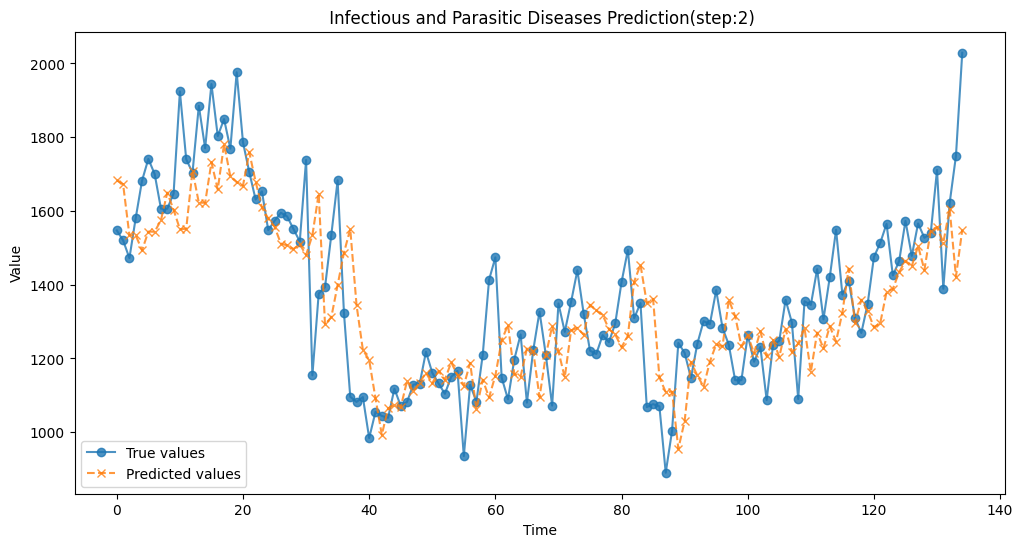

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True values', linestyle='-', marker='o', alpha=0.8)
plt.plot(y_test_pred, label='Predicted values', linestyle='--', marker='x', alpha=0.8)
plt.title(' Infectious and Parasitic Diseases Prediction(step:{})'.format(n_steps))
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

### Autoregression with exogenous variables model (lasso)

In [ ]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
# Create the LassoCV model
tscv = TimeSeriesSplit(n_splits=5)
alphas = np.logspace(-4, 0, 200)  # You can adjust the range and number of alpha values to search
lasso_cv = LassoCV(alphas=alphas, cv=tscv, random_state=42)

lasso_cv.fit(X_train, y_train)

optimal_alpha = lasso_cv.alpha_
print("Optimal alpha value: ", optimal_alpha)

Optimal alpha value:  0.9547716114208056


In [ ]:
# Create the Lasso model with the optimal alpha value
model = Lasso(alpha=optimal_alpha)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_score = mean_squared_error(y_train, y_train_pred)
test_score = mean_squared_error(y_test, y_test_pred)

train_score_var = np.var(y_train)
train_score_r2 = 1 - (train_score / train_score_var)
test_score_var = np.var(y_test)
test_score_r2 = 1 - (test_score / test_score_var)

print('Training score: {:.2f}, Testing score: {:.2f}'.format(train_score, test_score))
print('R-squared score (training set): {:.2f}'.format(train_score_r2))
print('R-squared score (testing set): {:.2f}'.format(test_score_r2))

Training score: 12471.23, Testing score: 23812.75
R-squared score (training set): 0.70
R-squared score (testing set): 0.61


In [ ]:
# model.coef_

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_test_pred)

print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(n_steps,mape))

Mean Absolute Percentage Error for 2 step: 8.74%


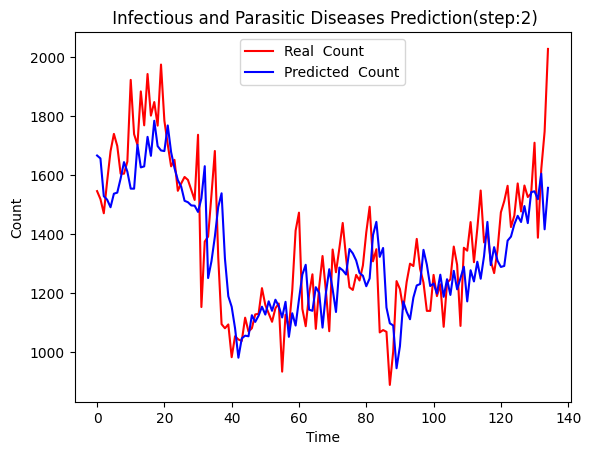

In [ ]:
plt.plot(y_test, color = 'red', label = 'Real  Count')
plt.plot(y_test_pred, color = 'blue', label = 'Predicted  Count')
plt.title(' Infectious and Parasitic Diseases Prediction(step:{})'.format(n_steps))
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()

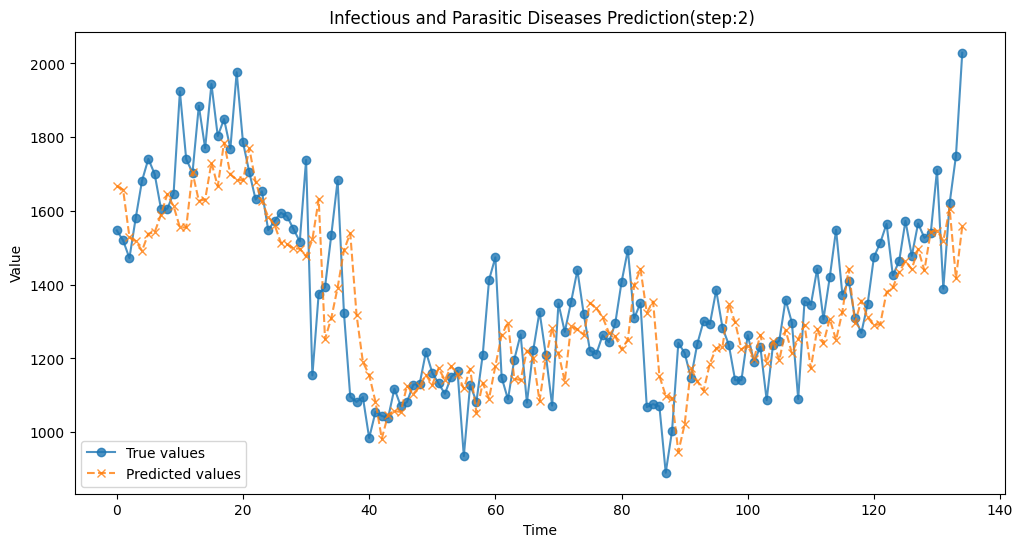

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True values', linestyle='-', marker='o', alpha=0.8)
plt.plot(y_test_pred, label='Predicted values', linestyle='--', marker='x', alpha=0.8)
plt.title(' Infectious and Parasitic Diseases Prediction(step:{})'.format(n_steps))
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

### CV

Cross validation for Autoregression

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)
total_mape = 0
total_mse = 0

for i, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Create the MLR model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)

    mape = mean_absolute_percentage_error(y_test, y_pred)

    print('Cross-Validation fold {}:'.format(i + 1))
    print('Mean Squared Error: {:.2f}'.format(mse))
    print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(n_steps, mape))
    print()

    total_mape += mape
    total_mse += mse

average_mape = total_mape / tscv.n_splits
average_mse = total_mse / tscv.n_splits

print('Average Mean Squared Error: {:.2f}'.format(average_mse))
print('Average Mean Absolute Percentage Error for {} step: {:.2f}%'.format(n_steps, average_mape))

Cross-Validation fold 1:
Mean Squared Error: 16106.74
Mean Absolute Percentage Error for 2 step: 10.17%

Cross-Validation fold 2:
Mean Squared Error: 17071.60
Mean Absolute Percentage Error for 2 step: 8.21%

Cross-Validation fold 3:
Mean Squared Error: 21769.96
Mean Absolute Percentage Error for 2 step: 7.87%

Cross-Validation fold 4:
Mean Squared Error: 17980.94
Mean Absolute Percentage Error for 2 step: 7.15%

Cross-Validation fold 5:
Mean Squared Error: 23937.93
Mean Absolute Percentage Error for 2 step: 9.07%

Average Mean Squared Error: 19373.43
Average Mean Absolute Percentage Error for 2 step: 8.50%


Cross validation for Autoregression (lasso)

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)
total_mape = 0
total_mse = 0

for i, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Create the LassoCV model
    tscv = TimeSeriesSplit(n_splits=5)
    alphas = np.logspace(-4, 0, 200)  # You can adjust the range and number of alpha values to search
    lasso_cv = LassoCV(alphas=alphas, cv=tscv, random_state=42)

    lasso_cv.fit(X_train, y_train)

    optimal_alpha = lasso_cv.alpha_

    # Create the Lasso model with the optimal alpha value
    model = Lasso(alpha=optimal_alpha)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)

    mape = mean_absolute_percentage_error(y_test, y_pred)

    print('Cross-Validation fold {}:'.format(i + 1))
    print('Mean Squared Error: {:.2f}'.format(mse))
    print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(n_steps, mape))
    print()

    total_mape += mape
    total_mse += mse

average_mape = total_mape / tscv.n_splits
average_mse = total_mse / tscv.n_splits

print('Average Mean Squared Error: {:.2f}'.format(average_mse))
print('Average Mean Absolute Percentage Error for {} step: {:.2f}%'.format(n_steps, average_mape))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.995e+01, tolerance: 1.650e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.332e+02, tolerance: 1.650e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.122e+02, tolerance: 1.650e+01

Cross-Validation fold 1:
Mean Squared Error: 14834.22
Mean Absolute Percentage Error for 2 step: 9.72%

Cross-Validation fold 2:
Mean Squared Error: 16694.27
Mean Absolute Percentage Error for 2 step: 8.10%

Cross-Validation fold 3:
Mean Squared Error: 22503.21
Mean Absolute Percentage Error for 2 step: 7.97%

Cross-Validation fold 4:
Mean Squared Error: 18374.46
Mean Absolute Percentage Error for 2 step: 7.13%

Cross-Validation fold 5:
Mean Squared Error: 23257.85
Mean Absolute Percentage Error for 2 step: 8.96%

Average Mean Squared Error: 19132.80
Average Mean Absolute Percentage Error for 2 step: 8.37%
